In [11]:
import pandas as pd
from preprocessing import data_preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Read Data from CSV
df = pd.read_csv('reddit_sentiment.csv')

In [5]:
# Preprocess the data
df = data_preprocessing(df)

In [6]:
X = df['Body']
y = df['Sentiment_Label']

In [7]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df['Body'], df['Sentiment_Label'], test_size=0.2, random_state=42, stratify=df['Sentiment_Label'], shuffle=True
)

# Vectorizer

In [8]:
# Vectorize the data
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 2))
X_count = vectorizer.fit_transform(X)
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [7]:
# cross validation for count vectorizer
from sklearn.model_selection import cross_validate
import numpy as np

model = RandomForestClassifier(n_estimators=100, random_state=42)
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(model, X_count, y, cv=skf, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Accuracy: 0.6987281399046106
Precision: 0.7008828520895911
Recall: 0.5009949696531446
F1: 0.492313607012122


Confusion Matrix:
 [[ 18   8 287]
 [  0  55  60]
 [  7  23 800]]


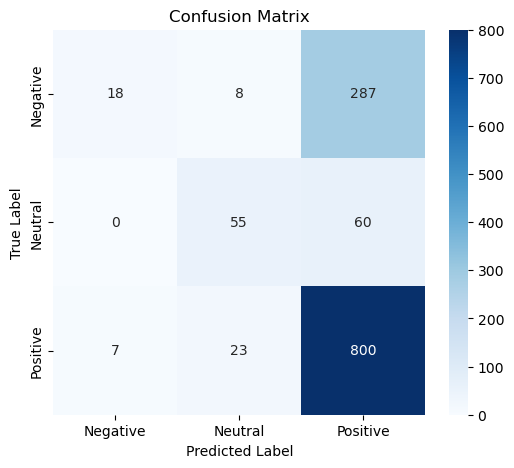

In [8]:
# confusion matrix
model.fit(X_train_count, y_train)
y_pred = model.predict(X_test_count)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


---

In [9]:
# Vectorize the data
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# cross validation for tfidf
model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(model_tfidf, X_tfidf, y, cv=skf, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Accuracy: 0.6963434022257553
Precision: 0.7111089833247553
Recall: 0.48419998005069775
F1: 0.47872726609024835


Confusion Matrix:
 [[ 15   3 295]
 [  0  50  65]
 [  7  19 804]]


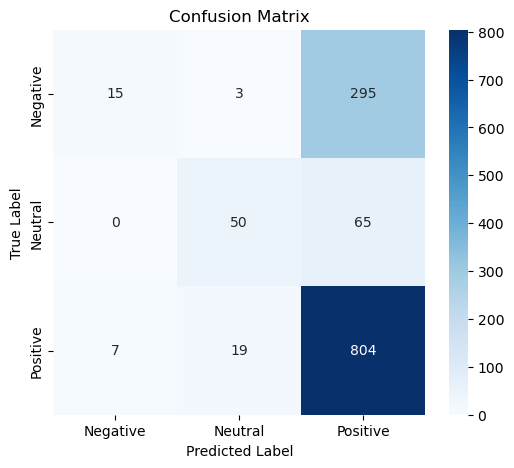

In [11]:
# confusion matrix
model_tfidf.fit(X_train_tfidf, y_train)
y_pred = model_tfidf.predict(X_test_tfidf)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


---

In [7]:
import gensim.downloader as api

w2v_model = api.load("word2vec-google-news-300")  # Google News 300 維度詞向量

print(w2v_model.most_similar("stock"))


[('shares', 0.7760441899299622), ('stocks', 0.6025431752204895), ('Shares', 0.5807890295982361), ('Stock', 0.5690754652023315), ('stockmarket', 0.5496109127998352), ('market_capitalization', 0.5441644191741943), ('VNDA', 0.5439260005950928), ('Autozone_NYSE_AZO', 0.5406639575958252), ('Insider_buying', 0.5401883125305176), ('shareprice', 0.5363472104072571)]


In [8]:
import numpy as np

def text_to_w2v(text, model=w2v_model):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)  # 300 維向量

X_w2v = np.array([text_to_w2v(text) for text in X])
X_train_w2v = np.array([text_to_w2v(text) for text in X_train])
X_test_w2v = np.array([text_to_w2v(text) for text in X_test])


In [9]:
# cross validation for w2v
model_w2v = RandomForestClassifier(n_estimators=100, random_state=42)
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(model_w2v, X_w2v, y, cv=skf, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))


Accuracy: 0.7068362480127186
Precision: 0.7100630078269754
Recall: 0.48346753400024856
F1: 0.5115819911062088


# Resampling

In [12]:
from imblearn.over_sampling import  
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

model_ros = RandomForestClassifier(n_estimators=100, random_state=42)
ros = RandomOverSampler(random_state=42)
pipeline = Pipeline([
    ('ROS', ros), 
    ('RF', model_ros)
])
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(pipeline, X_tfidf, y, cv=cv, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))


Accuracy: 0.7038155802861684
Precision: 0.6635915884348533
Recall: 0.5438667406944575
F1: 0.5274340083643196


In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
smote = SMOTE(random_state=42)
pipeline = Pipeline([
    ('SMOTE', smote), 
    ('RF', model_smote)
])
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(pipeline, X_tfidf, y, cv=cv, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Accuracy: 0.6777424483306836
Precision: 0.572252325292593
Recall: 0.5508551405022546
F1: 0.5360292565691688


In [21]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

model_rus = RandomForestClassifier(n_estimators=100, random_state=42)
rus = RandomUnderSampler(random_state=42, sampling_strategy={1: 1800})
pipeline = Pipeline([
    ('RUS', rus), 
    ('RF', model_rus)
])
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(pipeline, X_tfidf, y, cv=cv, scoring=scorings)

print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Accuracy: 0.7076311605723371
Precision: 0.6317071943106597
Recall: 0.5722466352568532
F1: 0.5747915713653466
